### 2024/02/16 座標数の調査

In [1]:
import pandas as pd
import numpy as np
import requests
import io
import math
import copy
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import patches

In [ ]:
df = pd.read_csv('../temp/coord_size_alldrawing.csv')

(array([1677091.,  255083.,   52471.,   23667.,   12263.,    8730.,
           6148.,    4445.,    3419.,    2625.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

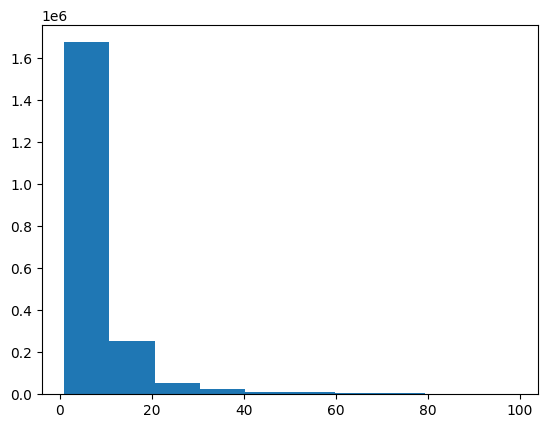

In [ ]:
plt.hist([value for value in df['coord_size_org'] if value < 100])

In [2]:
class PreprocessedDataForCount():
    def __init__(self, url, rotate_type):
        self.CANVAS_HEIGHT = 297
        self.CANVAS_WIDTH = 420
        self.MAX_POINT = 943
        self.NORM_DIVISOR = 3
        self.columns = [ 'time', 'alpha', 'max_points', 'ptx_anoto', 'pty_anoto', 'shape_str',
                    'pressure_style', 'len_mm_acc', 'len_anoto', 'pressure_avg', 'shape_int']
        self.BIN_HEIGHT = 420
        self.BIN_WIDTH = 420
        
        self.df_org = None
        self.df_mm = None
        self.df_remove_overlap = None
        
        self.url = url
        self.rotate_type = rotate_type
        
        # urlからデータを作成
        self.get_df(self.url)
        self.conv_str_to_coord()

        self.remove_overlap_coord()
        ################################
        
    # URLからデータフレームを取得 & ストローク長の列を追加
    def get_df(self, url):
        content = requests.get(url, auth=('19t2003a', 'ireneRED77')).content
        df = pd.read_table(io.StringIO(content.decode('utf-8')), header = None)
        df.columns = self.columns
        st_len_mm = [l*0.3 for l in df['len_anoto']]
        df['len_mm'] = st_len_mm
        # ストローク固有のidを付与
        df_reindex = df.reset_index()
        df_reindex = df_reindex.rename(columns={'index': 'stroke_id'})
        
        self.df_org = df_reindex.copy()
        
    # 文字列座標データをリストに変換 & anotoから普通座標に変換
    def conv_str_to_coord(self):
        df = self.df_org.copy()
        x_list = []
        y_list = []
        for str_x, str_y in zip(df['ptx_anoto'], df['pty_anoto']):
            x_list.append([float(x)*0.3 for x in str_x.split(',')])
            y_list.append([float(y)*0.3 for y in str_y.split(',')])
        df['ptx_mm'] = x_list
        df['pty_mm'] = y_list
        self.df_mm = df
    
    # 重複している座標を排除
    def remove_overlap_coord(self):
        df = self.df_mm.copy()
        
        org_ptxs = df['ptx_mm']
        org_ptys = df['pty_mm']
        remove_indexs = []
        for ptxs, ptys in zip(org_ptxs, org_ptys):
            remove_index = []
            for i in range(1, len(ptxs)):
                if ptxs[i] == ptxs[i-1] and ptys[i] == ptys[i-1]:
                    remove_index.append(i)
                else:
                    pass
            remove_indexs.append(remove_index)
        
        df['remove_index'] = remove_indexs
        
        remove_overlap_ptxs = []
        remove_overlap_ptys = []
        for ptxs, ptys, remove_index in zip(org_ptxs, org_ptys, df['remove_index']):
            remove_overlap_ptx = [ ptxs[i] for i in range(len(ptxs)) if i not in remove_index]
            remove_overlap_pty = [ ptys[i] for i in range(len(ptys)) if i not in remove_index]
            remove_overlap_ptxs.append(remove_overlap_ptx)
            remove_overlap_ptys.append(remove_overlap_pty)    
        
        df['ptx_mm'] = remove_overlap_ptxs
        df['pty_mm'] = remove_overlap_ptys
        
        self.df_remove_overlap = df


In [4]:
drawing_info = pd.read_excel('../data/all_drawing_info.xlsx', index_col=0)
drawing_info = drawing_info.query('is_asai == 1')
pre_box = drawing_info.query('is_preanalysis_box == 1')
pre_bag = drawing_info.query('is_preanalysis_bag == 1')

In [5]:
coord_sizes_org = []
coord_sizes_remove_overlap = []
length_mm = []
for id, url, rtype in zip(drawing_info['drawing_id'], drawing_info['url'], drawing_info['rotate_type']):
    data = PreprocessedDataForCount(url, rtype)
    
    # オリジナルのリスト
    coord_sizes_org.append([len(coord) for coord in data.df_mm['ptx_mm']])
    
    # 連続重複削除済みのリスト
    coord_sizes_remove_overlap.append([len(coord) for coord in data.df_remove_overlap['ptx_mm']])
    
    # ストロークの長さ
    length_mm.append([l for l in data.df_mm['len_mm']])
    
    print(id, ' | finish!')

0  | finish!
1  | finish!
2  | finish!
3  | finish!
4  | finish!
5  | finish!
6  | finish!
7  | finish!
8  | finish!
9  | finish!
10  | finish!
11  | finish!
12  | finish!
13  | finish!
14  | finish!
15  | finish!
16  | finish!
17  | finish!
18  | finish!
19  | finish!
20  | finish!
21  | finish!
22  | finish!
23  | finish!
24  | finish!
25  | finish!
26  | finish!
27  | finish!
28  | finish!
29  | finish!
30  | finish!
31  | finish!
32  | finish!
33  | finish!
34  | finish!
35  | finish!
36  | finish!
37  | finish!
38  | finish!
39  | finish!
40  | finish!
41  | finish!
42  | finish!
43  | finish!
44  | finish!
45  | finish!
46  | finish!
47  | finish!
48  | finish!
49  | finish!
50  | finish!
51  | finish!
52  | finish!
53  | finish!
54  | finish!
55  | finish!
56  | finish!
57  | finish!
58  | finish!
59  | finish!
60  | finish!
61  | finish!
62  | finish!
63  | finish!
64  | finish!
65  | finish!
66  | finish!
67  | finish!
68  | finish!
69  | finish!
70  | finish!
71  | finish!
72

In [6]:
df_coord_size = pd.DataFrame({
    'drawing_id': drawing_info['drawing_id'],
    'coordsize_org': coord_sizes_org,
    'coordsize_rm_overlap': coord_sizes_remove_overlap,
    'length[mm]': length_mm
})

df_coord_size.to_pickle('../temp/20240305_coordsize_length.pkl')

In [9]:
coord_sizes_org_union = []
coord_sizes_remove_overlap_union = []
length_mm_union = []

for csize_org, csize_rm, len_mm in zip(coord_sizes_org, coord_sizes_remove_overlap, length_mm):
    coord_sizes_org_union += csize_org
    coord_sizes_remove_overlap_union += csize_rm
    length_mm_union += len_mm


In [10]:
df_coord_size_csv = pd.DataFrame({'coord_size_org': coord_sizes_org_union,
                                    'coord_sizes_remove_overlap': coord_sizes_remove_overlap_union,
                                    'length_mm': length_mm_union})
df_coord_size_csv.to_csv('../temp/20240305coordsize_length_alldrawing.csv')

In [ ]:
# 箱ひげ図を作成する
def boxviolinplot(plot_list, label, ymin, ymax):
    title = ''
    plt.rcParams['font.family'] = 'MS Gothic'
    FIG_WIDTH = 15
    FIG_HEIGHT = 7
    fig, ax = plt.subplots(figsize=(FIG_WIDTH, FIG_HEIGHT), facecolor='white')
    ax.set_ylim(ymin, ymax)
    ax.grid(True)
    ax.set_xticklabels(label)

    ax.set_title(title)
    
    # ax.boxplot(plot_list, whis=(0, 100))
    # ax.boxplot(plot_list, whis=(5, 95))
    
    ax.boxplot(plot_list, whis=1.5)
    
    # ax.violinplot(plot_list)
    
    plt.show()
    plt.close()
    return

##### ▶基本統計量

In [ ]:
print('最小',df_coord_size_csv.min())
print('----------')
print('最大',df_coord_size_csv.max())
print('----------')

print('平均',df_coord_size_csv.mean())
print('----------')
print('標準偏差',df_coord_size_csv.std(ddof=0)) # ddof=0:標本標準偏差 ddof=1:母標準偏差
print('----------')
print('分散',df_coord_size_csv.var(ddof=0))
print('----------')

print('中央値',df_coord_size_csv.median())
print('----------')
print('四分位',df_coord_size_csv.quantile(q=[0.25, 0.75]))
print('----------')
print('最頻値',df_coord_size_csv.mode())

最小 coord_size_org                1
coord_sizes_remove_overlap    1
dtype: int64
----------
最大 coord_size_org                9187
coord_sizes_remove_overlap    8273
dtype: int64
----------
平均 coord_size_org                10.067502
coord_sizes_remove_overlap    10.025807
dtype: float64
----------
標準偏差 coord_size_org                23.292936
coord_sizes_remove_overlap    22.935129
dtype: float64
----------
分散 coord_size_org                542.560871
coord_sizes_remove_overlap    526.020156
dtype: float64
----------
中央値 coord_size_org                7.0
coord_sizes_remove_overlap    7.0
dtype: float64
----------
四分位       coord_size_org  coord_sizes_remove_overlap
0.25             5.0                         5.0
0.75             9.0                         9.0
----------
最頻値    coord_size_org  coord_sizes_remove_overlap
0               6                           6


In [ ]:
# mean + 3*std = 79
max_value = 79
ranged_coord_org = [value for value in coord_sizes_org_union if value <= max_value]
ranged_coord_rmover = [value for value in coord_sizes_remove_overlap_union if value <= max_value]

オリジナル


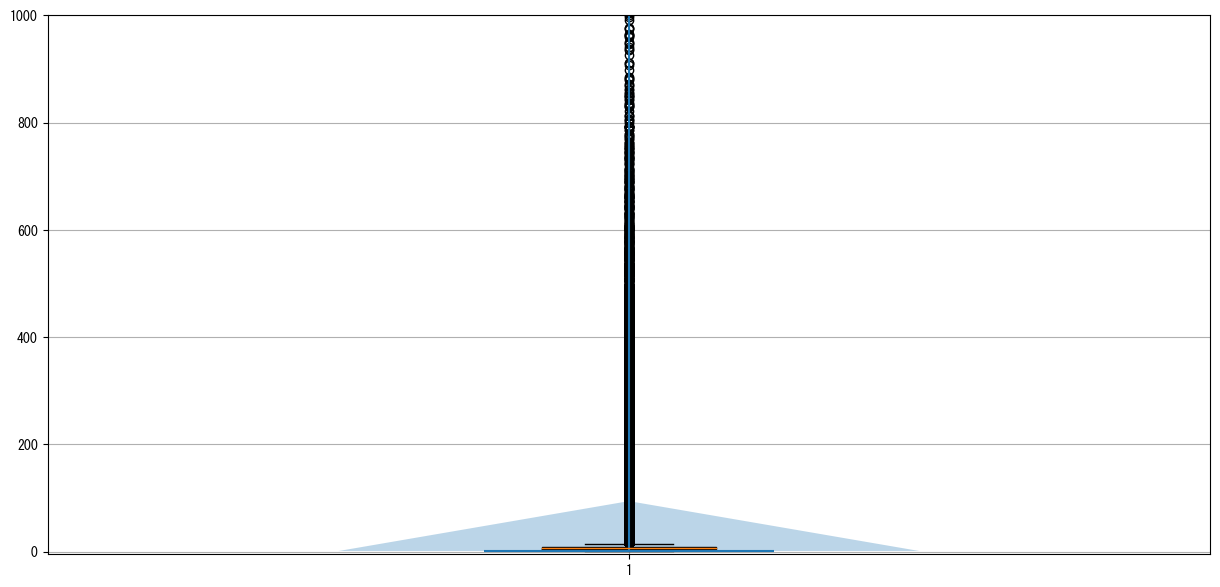

重複排除


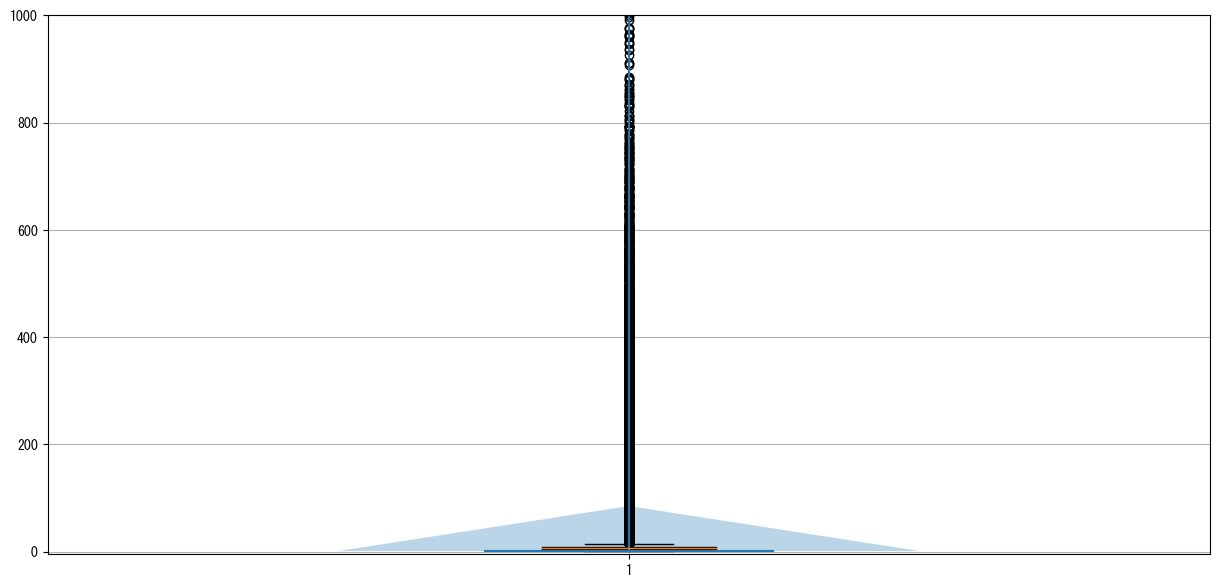

In [ ]:
print('オリジナル')
boxviolinplot(coord_sizes_org_union, '', 1000)
print('重複排除')
boxviolinplot(coord_sizes_remove_overlap_union, '', 1000)

##### ▶データ数の調査

In [ ]:
max_value = 79
print('全データ     |', len(coord_sizes_remove_overlap_union))
print('標準データ   | ', len([value for value in coord_sizes_remove_overlap_union if max_value >= value]))
print('外れ値データ | ', len([value for value in coord_sizes_remove_overlap_union if max_value < value]))

全データ     | 2061900
標準データ   |  2040092
外れ値データ |  21808


##### ▶ドローイングごとの座標数超過の割合

In [ ]:
df_coord_size = pd.read_pickle('../temp/20240216_coordsize.pkl')

In [ ]:
mean_3std_org = []
mean_3std_rmover = []
mean_6std_org = []
mean_6std_rmover = []
mean_3std = 79
mean_6std = 148

for drawing_id, org_sizes, rm_sizes in zip(df_coord_size['drawing_id'], df_coord_size['coordsize_org'], df_coord_size['coordsize_rm_overlap']):
    mean_3std_org.append([value for value in org_sizes if value > mean_3std])
    mean_3std_rmover.append([value for value in rm_sizes if value > mean_3std])
    mean_6std_org.append([value for value in org_sizes if value > mean_6std])
    mean_6std_rmover.append([value for value in rm_sizes if value > mean_6std])
    
df_coord_size_mean3std = pd.DataFrame({
    'drawing_id': df_coord_size['drawing_id'],
    'coordsize_org': df_coord_size['coordsize_org'],
    'coordsize_rm_overlap': df_coord_size['coordsize_rm_overlap'],
    'outlier_mean3std_org': mean_3std_org,
    'outlier_mean3std_rm_overlap': mean_3std_rmover,
    'outlier_mean6std_org': mean_6std_org,
    'outlier_mean6std_rm_overlap': mean_6std_rmover,
})

df_coord_size_mean3std.to_pickle('../temp/20240219_coordsize_mean3-6std.pkl')

In [ ]:
len_mean3std_org = [len(values) for values in df_coord_size_mean3std['outlier_mean3std_org']]
len_mean3std_rmover = [len(values) for values in df_coord_size_mean3std['outlier_mean3std_rm_overlap']]

ratio_outlier_org = [len(outliers) / len(allstrokes) for outliers, allstrokes in zip(
    df_coord_size_mean3std['outlier_mean3std_org'], df_coord_size_mean3std['coordsize_org'])]
ratio_outlier_rmover = [len(outliers) / len(allstrokes) for outliers, allstrokes in zip(
    df_coord_size_mean3std['outlier_mean3std_rm_overlap'], df_coord_size_mean3std['coordsize_rm_overlap'])]


オリジナル


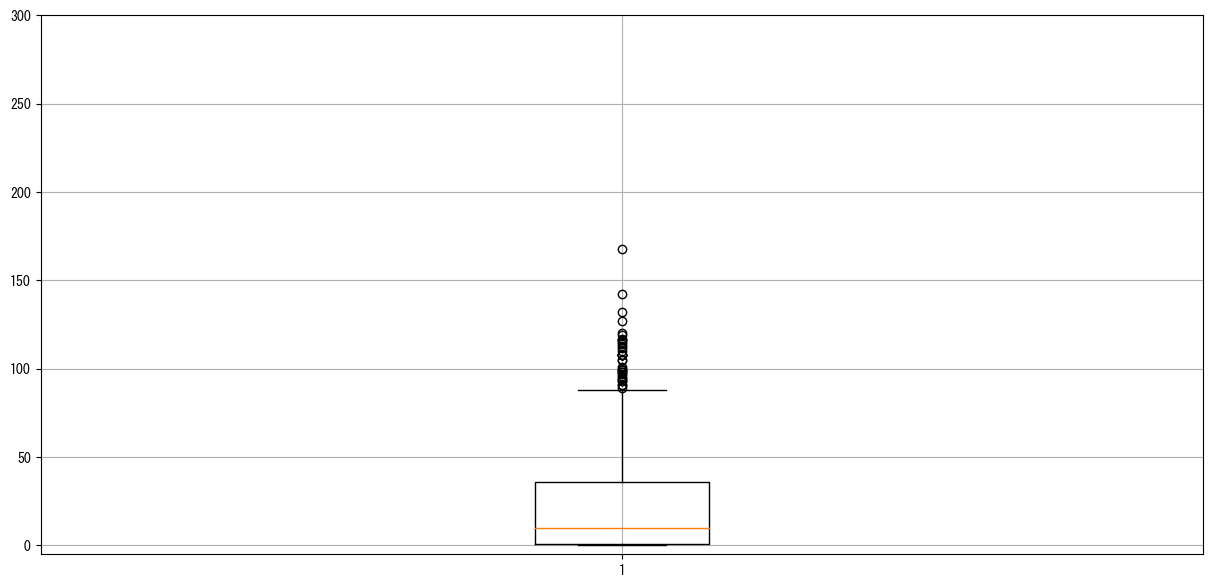

重複排除


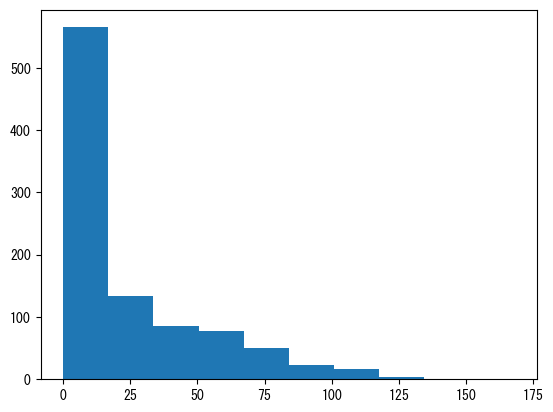

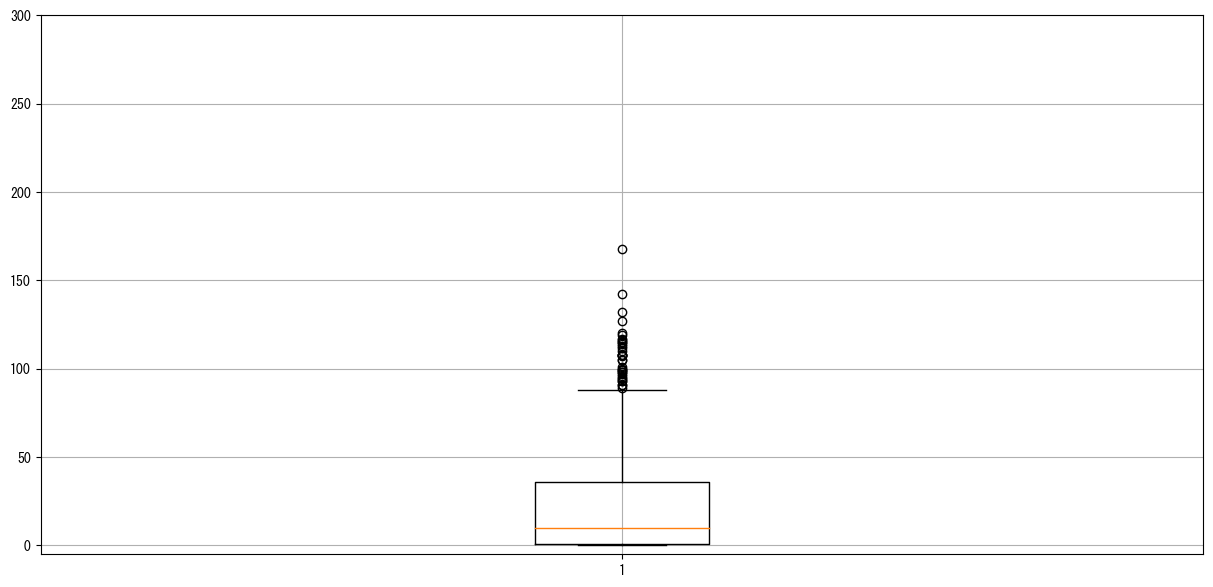

オリジナル


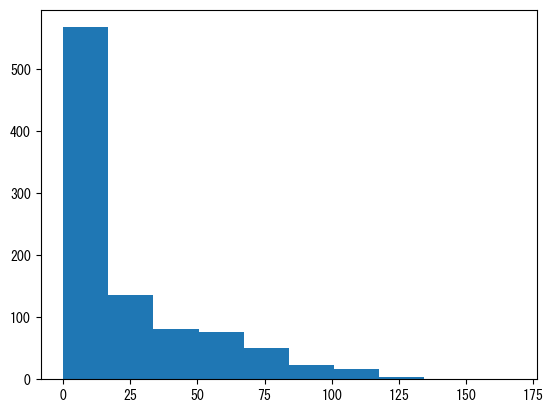

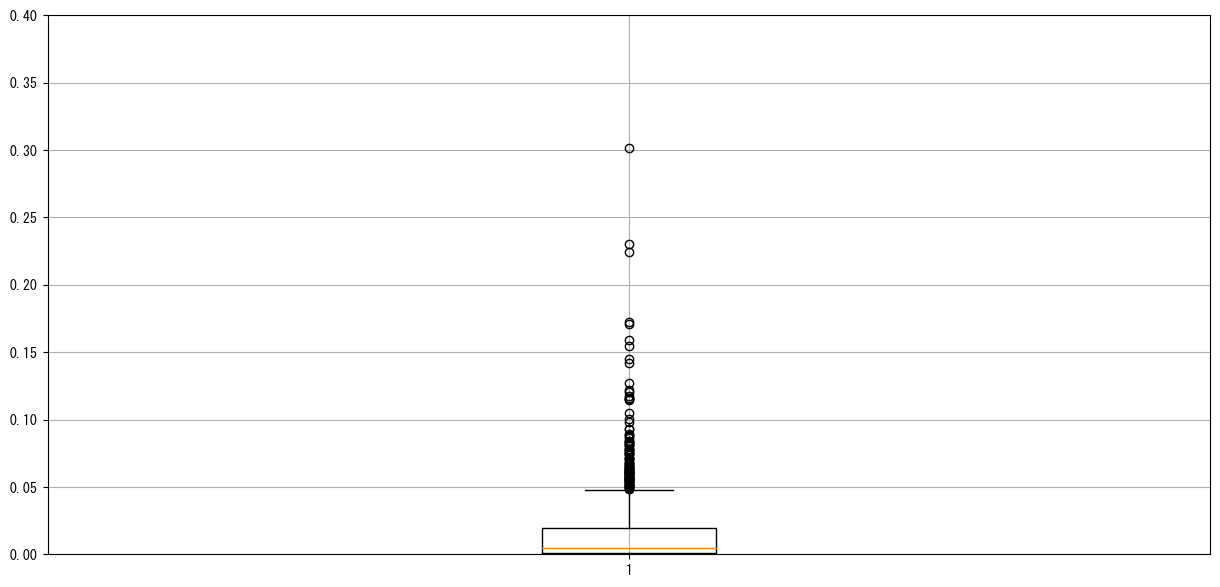

重複排除


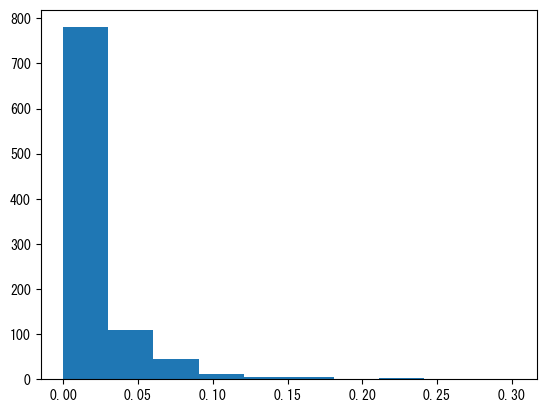

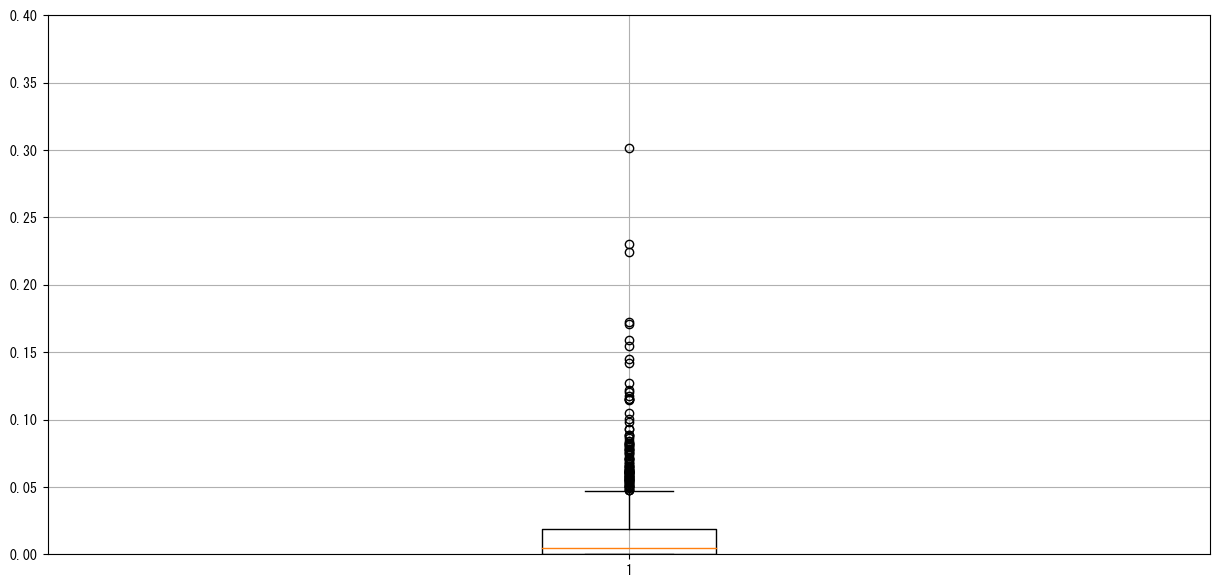

(array([782., 109.,  44.,  11.,   4.,   4.,   0.,   2.,   0.,   1.]),
 array([0.        , 0.03016158, 0.06032316, 0.09048474, 0.12064632,
        0.1508079 , 0.18096948, 0.21113106, 0.24129264, 0.27145422,
        0.3016158 ]),
 <BarContainer object of 10 artists>)

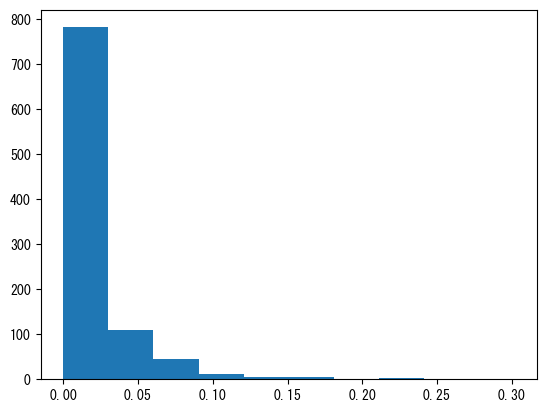

In [ ]:
print('オリジナル')
boxviolinplot(len_mean3std_org, '', -5, 300)
plt.hist(len_mean3std_org)

print('重複排除')
boxviolinplot(len_mean3std_rmover, '', -5, 300)
plt.hist(len_mean3std_rmover)

print('=========================================')
print('オリジナル')
boxviolinplot(ratio_outlier_org, '', 0, 0.4)
plt.hist(ratio_outlier_org)

print('重複排除')
boxviolinplot(ratio_outlier_rmover, '', 0, 0.4)
plt.hist(ratio_outlier_rmover)


##### ▶予備解析対象での座標数を調べる

In [ ]:
df_mean3std = pd.read_pickle('../temp/20240219_coordsize_mean3-6std.pkl')

id_prebox = pre_box['drawing_id'].to_list()
id_prebag = pre_bag['drawing_id'].to_list()

coordsize_prebox = df_mean3std.query('drawing_id in @id_prebox')
coordsize_prebag = df_mean3std.query('drawing_id in @id_prebag')

cnt_outlier_box_3std = [len(values) for values in coordsize_prebox['outlier_mean3std_org']]
cnt_outlier_bag_3std = [len(values) for values in coordsize_prebag['outlier_mean3std_org']]

cnt_outlier_box_6std = [len(values) for values in coordsize_prebox['outlier_mean6std_org']]
cnt_outlier_bag_6std = [len(values) for values in coordsize_prebag['outlier_mean6std_org']]


In [ ]:
print("予備解析の紙箱 座標数の外れ値 mean + 3*σ:")
print(cnt_outlier_box_3std)
print("予備解析の紙袋 座標数の外れ値 mean + 3*σ:")
print(cnt_outlier_bag_3std)

print('====================================')
print("予備解析の紙箱 座標数の外れ値 mean + 6*σ:")
print(cnt_outlier_box_6std)
print("予備解析の紙袋 座標数の外れ値 mean + 6*σ:")
print(cnt_outlier_bag_6std)

予備解析の紙箱 座標数の外れ値 mean + 3*σ:
[86, 8, 51, 52, 16, 0, 4, 13, 19, 3, 6, 26, 55]
予備解析の紙袋 座標数の外れ値 mean + 3*σ:
[5, 3, 74, 41, 45, 9, 52, 73, 5, 73]
予備解析の紙箱 座標数の外れ値 mean + 6*σ:
[28, 2, 15, 18, 5, 0, 1, 1, 3, 2, 0, 4, 21]
予備解析の紙袋 座標数の外れ値 mean + 6*σ:
[1, 0, 19, 15, 7, 1, 12, 13, 0, 17]
